In [3]:
import pandas as pd
import joblib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [4]:
df = pd.read_csv('german_credit_data.csv')

In [5]:
df.drop('Unnamed: 0', axis = 1, inplace=True)

In [6]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [13]:
df.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [15]:
df['Saving accounts'].fillna('Nan', inplace=True)

In [17]:
df['Checking account'].fillna('Nan', inplace=True)

In [19]:
df.isna().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

In [21]:
df['Saving accounts'].unique()

array(['Nan', 'little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [23]:
categorical_columns = ['Sex', 'Housing', 'Checking account', 'Purpose']
order = [['Nan', 'little', 'quite rich', 'rich', 'moderate']]

In [25]:
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [27]:
oe = OrdinalEncoder(categories=order)

In [29]:
df['Saving accounts'] = oe.fit_transform(df[['Saving accounts']])

In [31]:
for column in df.columns:
    if df[column].dtype == 'bool':
        df[column] = df[column].astype(int)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          1000 non-null   int64  
 1   Job                          1000 non-null   int64  
 2   Saving accounts              1000 non-null   float64
 3   Credit amount                1000 non-null   int64  
 4   Duration                     1000 non-null   int64  
 5   Sex_male                     1000 non-null   int64  
 6   Housing_own                  1000 non-null   int64  
 7   Housing_rent                 1000 non-null   int64  
 8   Checking account_little      1000 non-null   int64  
 9   Checking account_moderate    1000 non-null   int64  
 10  Checking account_rich        1000 non-null   int64  
 11  Purpose_car                  1000 non-null   int64  
 12  Purpose_domestic appliances  1000 non-null   int64  
 13  Purpose_education  

In [35]:
df.describe()

,Age,Job,Saving accounts,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Checking account_little,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,35.546000,1.904000,1.285000,3271.258000,20.903000,0.690000,0.713000,0.179000,0.274000,0.269000,0.063000,0.337000,0.01200,0.059000,0.181000,0.280000,0.022000,0.01200
std,11.375469,0.653614,1.133605,2822.736876,12.058814,0.462725,0.452588,0.383544,0.446232,0.443662,0.243085,0.472921,0.10894,0.235743,0.385211,0.449224,0.146757,0.10894
min,19.000000,0.000000,0.000000,250.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,27.000000,2.000000,1.000000,1365.500000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,33.000000,2.000000,1.000000,2319.500000,18.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,42.000000,2.000000,1.000000,3972.250000,24.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.00000
max,75.000000,3.000000,4.000000,18424.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Распределение возрастов')

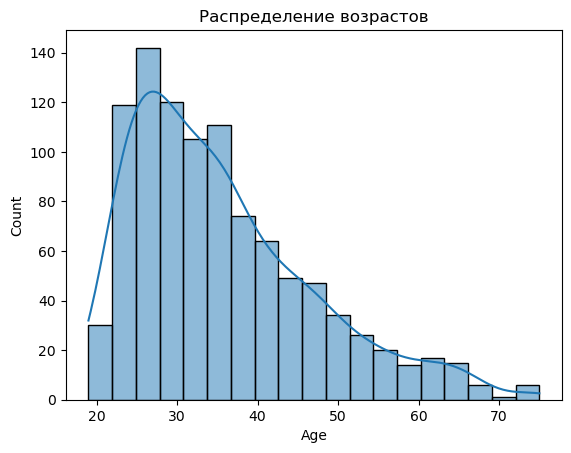

In [37]:
sns.histplot(df['Age'], kde=True)
plt.title('Распределение возрастов')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Распределение суммы кредита')

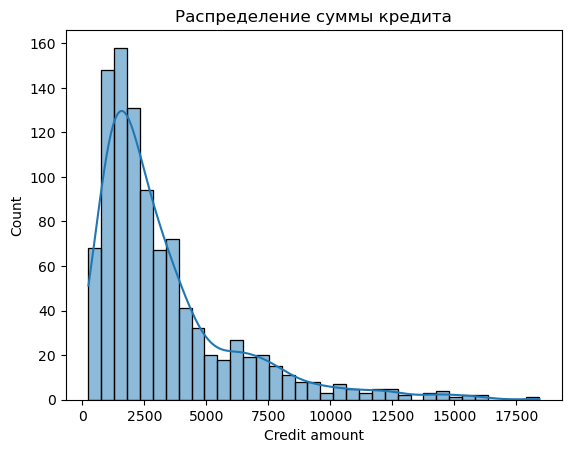

In [39]:
sns.histplot(df['Credit amount'], kde = True)
plt.title('Распределение суммы кредита')

In [41]:
df_corr = df.corr()

In [43]:
plt.figure(figsize=(10, 8), dpi = 200)

<Figure size 2000x1600 with 0 Axes>

<Figure size 2000x1600 with 0 Axes>

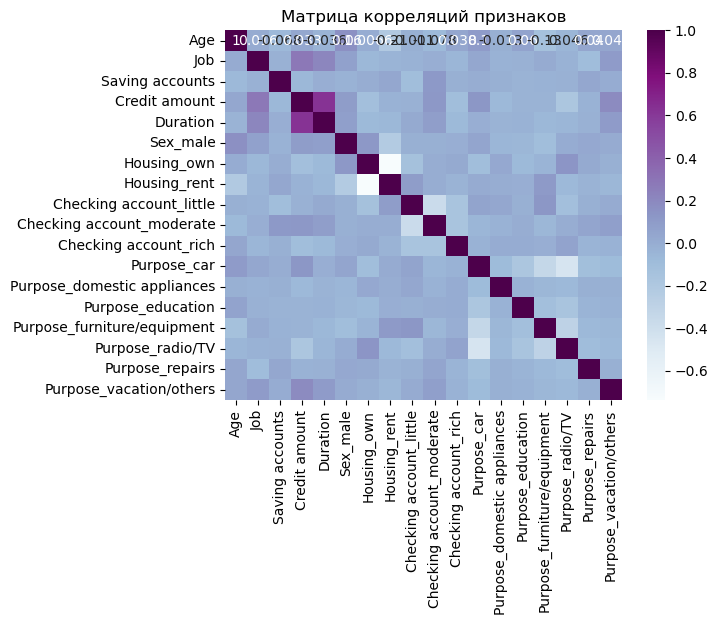

In [45]:
sns.heatmap(df_corr, annot=True, cmap='BuPu')
plt.title('Матрица корреляций признаков')
plt.show()

In [55]:
X = df.drop('Credit amount', axis=1)
y = df['Credit amount'] > df['Credit amount'].median()

0      False
1       True
2      False
3       True
4       True
       ...  
995    False
996     True
997    False
998    False
999     True
Name: Credit amount, Length: 1000, dtype: bool

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
scaler = StandardScaler()

In [63]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [71]:
max_depth=list(np.arange(1,5,1))
min_samples_leaf=list(np.arange(1, 25, 5))
n_estimators=[10, 50, 100, 300, 400, 500, 600]
grid_values = {'max_depth' : max_depth, 'min_samples_leaf': min_samples_leaf, 'n_estimators' : n_estimators}



In [73]:
clf = GridSearchCV(RandomForestClassifier(), grid_values, scoring = 'roc_auc', cv =5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4],
                         'min_samples_leaf': [1, 6, 11, 16, 21],
                         'n_estimators': [10, 50, 100, 300, 400, 500, 600]},
             scoring='roc_auc')

In [75]:
clf.best_params_

{'max_depth': 4, 'min_samples_leaf': 6, 'n_estimators': 500}

In [ ]:
Обучаем модель на таких данных

In [81]:
rand_clf = RandomForestClassifier(max_depth=4, min_samples_leaf= 6, n_estimators = 500)

In [83]:
rand_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=6, n_estimators=500)

In [85]:
y_pred = rand_clf.predict(X_test)

In [87]:
accuracy_score(y_test, y_pred)

0.755

In [89]:
roc_auc_score(y_test, y_pred)

0.752007226013649

In [91]:
rand_clf.feature_importances_

array([0.05159514, 0.12132866, 0.02129717, 0.61714493, 0.02652616,
       0.01090487, 0.00660254, 0.00590761, 0.01806269, 0.01366445,
       0.017062  , 0.00710432, 0.01381626, 0.01617689, 0.04854497,
       0.00151103, 0.0027503 ])

In [93]:
joblib.dump(rand_clf, 'credit_risk_random_forest_model.joblib')

['credit_risk_random_forest_model.joblib']

In [95]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print('-----------------')
print("Confusion Matrix:")
print(conf_matrix)
print('-----------------')
print("Classification Report:")
print(class_report)

Accuracy: 0.76
-----------------
Confusion Matrix:
[[85 21]
 [28 66]]
-----------------
Classification Report:
              precision    recall  f1-score   support

       False       0.75      0.80      0.78       106
        True       0.76      0.70      0.73        94

    accuracy                           0.76       200
   macro avg       0.76      0.75      0.75       200
weighted avg       0.76      0.76      0.75       200



In [97]:
n_estimators = [10, 50, 100, 300, 400, 500, 600]
max_depth=list(np.arange(1,5,1))
min_samples_leaf=list(np.arange(1, 25, 5))
values = {'n_estimators': n_estimators, 'max_depth' : max_depth, 'min_samples_leaf' : min_samples_leaf}

In [99]:
grid_bo = GridSearchCV(GradientBoostingClassifier(), values,scoring='roc_auc',  cv = 5)

In [101]:
grid_bo.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4],
                         'min_samples_leaf': [1, 6, 11, 16, 21],
                         'n_estimators': [10, 50, 100, 300, 400, 500, 600]},
             scoring='roc_auc')

In [103]:
grid_bo.best_params_

{'max_depth': 2, 'min_samples_leaf': 21, 'n_estimators': 50}

In [ ]:
Пользуемся 

In [105]:
grad_boost = GradientBoostingClassifier(n_estimators=50, max_depth=2, min_samples_leaf=21)

In [107]:
grad_boost.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=2, min_samples_leaf=21, n_estimators=50)

In [109]:
y_pred = grad_boost.predict(X_test)

In [111]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print('-----------------')
print("Confusion Matrix:")
print(conf_matrix)
print('-----------------')
print("Classification Report:")
print(class_report)

Accuracy: 0.76
-----------------
Confusion Matrix:
[[89 17]
 [31 63]]
-----------------
Classification Report:
              precision    recall  f1-score   support

       False       0.74      0.84      0.79       106
        True       0.79      0.67      0.72        94

    accuracy                           0.76       200
   macro avg       0.76      0.75      0.76       200
weighted avg       0.76      0.76      0.76       200



In [113]:
joblib.dump(grad_boost, 'best_credit_risk_model.joblib')

['best_credit_risk_model.joblib']